In [1]:
import statsmodels.tools.eval_measures as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../../03_kpi/data/dc_bikes_with_features_formatted_daytime.csv", parse_dates=['datetime'], index_col=0)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,part_of_day
datetime,,,,,,,,,,,,,,,,,
01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,2011,1,1,0,0,night
01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,2011,1,1,1,0,night
01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2011,1,1,2,0,night
01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,2011,1,1,3,0,night
01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,2011,1,1,4,0,night


In [4]:
sample_means = []

In [5]:
windspeed = df['windspeed']
windspeed

datetime
01-01-2011 00:00     0.0000
01-01-2011 01:00     0.0000
01-01-2011 02:00     0.0000
01-01-2011 03:00     0.0000
01-01-2011 04:00     0.0000
                     ...   
31-12-2012 19:00    11.0014
31-12-2012 20:00    11.0014
31-12-2012 21:00    11.0014
31-12-2012 22:00     8.9981
31-12-2012 23:00     8.9981
Name: windspeed, Length: 17379, dtype: float64

In [10]:
windspeed_sample = windspeed.sample(n= 100, replace=True)
windspeed_sample

datetime
29-09-2012 20:00    12.9980
27-09-2011 07:00     7.0015
08-11-2011 20:00     0.0000
12-02-2011 22:00     6.0032
05-01-2012 06:00     8.9981
                     ...   
06-01-2012 05:00     8.9981
03-03-2011 23:00     6.0032
14-05-2011 07:00     0.0000
30-04-2011 23:00     7.0015
29-06-2012 12:00    16.9979
Name: windspeed, Length: 100, dtype: float64

In [11]:
for i in range(10_000):
    windspeed_sample = windspeed.sample(n= 100, replace=True)
    sample_means.append(windspeed_sample.mean())

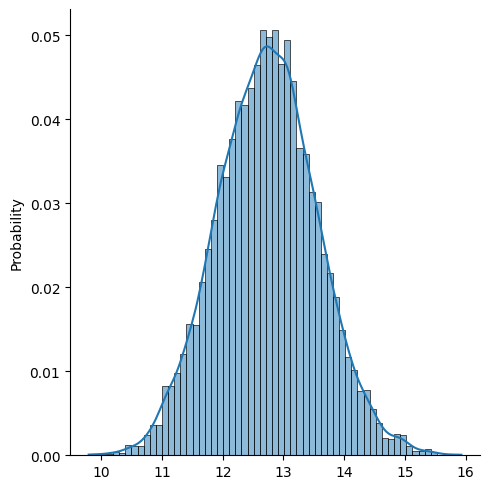

In [12]:
sns.displot(sample_means, kde=True, stat='probability')

In [13]:
sample_means_series = pd.Series(sample_means)

In [20]:
lower_limit = sample_means_series.quantile(0.025)
upper_limit = sample_means_series.quantile(0.975)

In [23]:
print(f'The Confidence Interval of an average windspeed in 2011, 2012 is between {lower_limit} and {upper_limit}')

The Confidence Interval of an average windspeed in 2011, 2012 is between 11.130239324999998 and 14.370796499999997


In [28]:
df['windspeed'].mean()

12.736539622532941

### Calculating using the z-value formula

In [29]:
sample_mean = windspeed.mean()
sample_std = windspeed.std()
print(sample_mean, sample_std)

12.736539622532941 8.196795314376963


In [31]:
z = 1.96
n = len(windspeed)

lower_limit_eq = sample_mean - ((z * sample_std) / np.sqrt(n))
upper_limit_eq = sample_mean + ((z * sample_std) / np.sqrt(n))

print(f'Calculated Confidence Interval of the average windspeed in 2011, 2012 is between {lower_limit_eq} and {upper_limit_eq}')


Calculated Confidence Interval of the average windspeed in 2011, 2012 is between 12.614672159587796 and 12.858407085478087
